**Dataset Info**

- Paper: Edge-IIoTset: A New Comprehensive Realistic Cyber Security Dataset of IoT and IIoT Applications for Centralized and Federated Learning
- Published in: IEEE Access
- Date: 08 April 2022
- Links: 
    - https://ieeexplore.ieee.org/document/9751703
    - https://www.kaggle.com/code/salma20/edge-iiotset-binary-classification

In [91]:
import os
import pandas as pd

df = pd.read_csv(os.getcwd() + '/../data/edge-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv', low_memory=False)

In [92]:
print("No of Featueres: ", len(df.columns))
print("Features: ", df.columns)

No of Featueres:  63
Features:  Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.confl

In [93]:
print(df.head(1).to_json(orient='records', lines=True))

{"frame.time":"6.0","ip.src_host":"192.168.0.152","ip.dst_host":"0.0","arp.dst.proto_ipv4":"0.0","arp.opcode":0.0,"arp.hw.size":0.0,"arp.src.proto_ipv4":"0.0","icmp.checksum":0.0,"icmp.seq_le":0.0,"icmp.transmit_timestamp":0.0,"icmp.unused":0.0,"http.file_data":"0.0","http.content_length":0.0,"http.request.uri.query":"0.0","http.request.method":"0.0","http.referer":"0.0","http.request.full_uri":"0.0","http.request.version":"0","http.response":0.0,"http.tls_port":0.0,"tcp.ack":0.0,"tcp.ack_raw":0.0,"tcp.checksum":0.0,"tcp.connection.fin":0.0,"tcp.connection.rst":0.0,"tcp.connection.syn":0.0,"tcp.connection.synack":0.0,"tcp.dstport":0.0,"tcp.flags":0.0,"tcp.flags.ack":0.0,"tcp.len":0.0,"tcp.options":"0.0","tcp.payload":"0.0","tcp.seq":0.0,"tcp.srcport":"0","udp.port":0.0,"udp.stream":0.0,"udp.time_delta":0.0,"dns.qry.name":0.0,"dns.qry.name.len":"0.0","dns.qry.qu":0.0,"dns.qry.type":0.0,"dns.retransmission":0.0,"dns.retransmit_request":0.0,"dns.retransmit_request_in":0.0,"mqtt.conack.fla

In [106]:
print(len(df))
print("No of lables: ", len(df['Attack_label'].unique()))
print(df['Attack_label'].unique())
print("No of classes: ", len(df['Attack_type'].unique()))
print(df['Attack_type'].unique())


157800
No of lables:  2
[1 0]
No of classes:  15
['MITM' 'Fingerprinting' 'Ransomware' 'Uploading' 'SQL_injection'
 'DDoS_HTTP' 'DDoS_TCP' 'Password' 'Port_Scanning' 'Vulnerability_scanner'
 'Backdoor' 'XSS' 'Normal' 'DDoS_UDP' 'DDoS_ICMP']


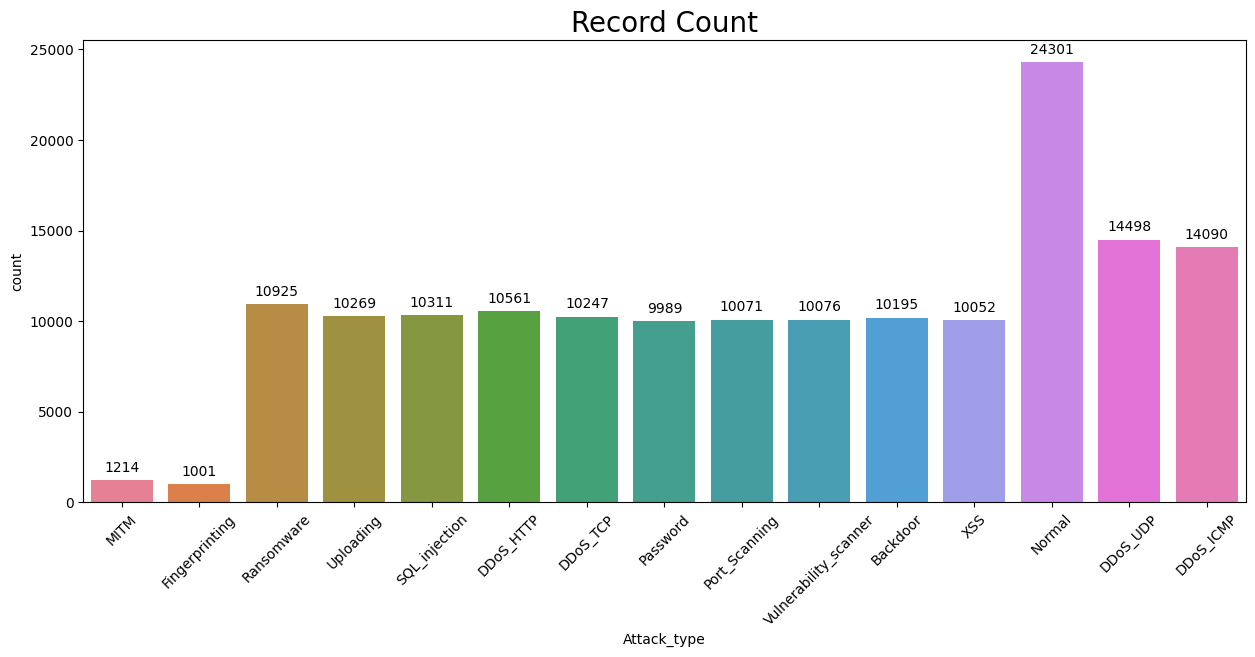

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
s = sns.countplot(data=df, x='Attack_type', hue='Attack_type')
for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
plt.title('Record Count', fontsize=20)

plt.show()

In [103]:
import numpy as np

# remove columns if mean is 0
columns_to_drop = []
for c in df.select_dtypes(include=[np.number]).columns:
    if df[c].mean() == 0:
        columns_to_drop.append(c)
print("Columns to drop: ", columns_to_drop)

# get df with removed columns
df_with_dropped_columns = df.drop(columns_to_drop, axis=1)
print("Number of columns before removing columns: ", len(df.columns))
print("Number of columns after removing columns: ", len(df_with_dropped_columns.columns))

# remove duplicate rows
df_no_duplicates = df_with_dropped_columns.drop_duplicates()
print("Length of dataset before removing duplicates: ", len(df_with_dropped_columns))
print("Length of dataset after removing duplicates: ", len(df_no_duplicates))


Columns to drop:  ['icmp.unused', 'http.tls_port', 'dns.qry.type', 'dns.retransmit_request_in', 'mqtt.msg_decoded_as', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id']
Number of columns before removing columns:  63
Number of columns after removing columns:  55
Length of dataset before removing duplicates:  157800
Length of dataset after removing duplicates:  156986


In [104]:
df_no_duplicates.describe().T


,count,mean,std,min,25%,50%,75%,max
arp.opcode,156986.0,1.426879e-02,1.501671e-01,0.0,0.00,0.000000e+00,0.000000e+00,2.000000e+00
arp.hw.size,156986.0,6.015823e-02,5.977731e-01,0.0,0.00,0.000000e+00,0.000000e+00,6.000000e+00
icmp.checksum,156986.0,3.063093e+03,1.117102e+04,0.0,0.00,0.000000e+00,0.000000e+00,6.553200e+04
icmp.seq_le,156986.0,3.256780e+03,1.143321e+04,0.0,0.00,0.000000e+00,0.000000e+00,6.552400e+04
icmp.transmit_timestamp,156986.0,4.067800e+04,1.768640e+06,0.0,0.00,0.000000e+00,0.000000e+00,7.728902e+07
http.content_length,156986.0,1.479182e+01,2.302519e+02,0.0,0.00,0.000000e+00,0.000000e+00,8.365500e+04
http.response,156986.0,4.598499e-02,2.094532e-01,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
tcp.ack,156986.0,7.197165e+07,3.108831e+08,0.0,0.00,1.000000e+00,4.790000e+02,2.147333e+09
tcp.ack_raw,156986.0,1.365391e+09,1.295170e+09,0.0,0.00,1.173613e+09,2.372259e+09,4.294947e+09
tcp.checksum,156986.0,2.593036e+04,2.148818e+04,0.0,3333.25,2.411200e+04,4.482000e+04,6.553500e+04


In [118]:
sample_size = 10000

sample_df = pd.concat([
    df_no_duplicates[df_no_duplicates['Attack_label'] == 0].sample(n=sample_size//2, random_state=42),
    df_no_duplicates[df_no_duplicates['Attack_label'] == 1].sample(n=sample_size//2, random_state=42)
    ])

print("Length of dataset before sampling: ", len(sample_df))
sample_df.to_csv(os.getcwd() + f'/sample-{sample_size}-2.csv', index=False)

Length of dataset before sampling:  10000


In [101]:
def get_ns(sample_size, n_classes):
    base_size = sample_size // n_classes
    remainder = sample_size % n_classes
    groups = [base_size + 1] * remainder + [base_size] * (n_classes - remainder)
    return groups

# get sample df such that each class has equal number of samples
sample_size = 1000
# sample_df = pd.DataFrame(columns=df_no_duplicates.columns)
# attack_types = df_no_duplicates['Attack_type'].unique()
# ns = get_ns(sample_size, len(attack_types))
# for i in range(len(attack_types)):
#     attack_type = attack_types[i]
#     n = min(ns[i], len(df_no_duplicates[df_no_duplicates['Attack_type'] == attack_type]))
#     sample_df = pd.concat([sample_df, df_no_duplicates[df_no_duplicates['Attack_type'] == attack_type].sample(n=n, random_state=42)])

# print("Length of dataset before sampling: ", len(df_no_duplicates))
# print("Length of dataset after sampling: ", len(sample_df))
sample_df = df_with_dropped_columns.sample(n=sample_size, random_state=42)
sample_df.to_csv(os.getcwd() + f'/sample-{sample_size}.csv', index=False)

Text(0.5, 1.0, 'Record Count')

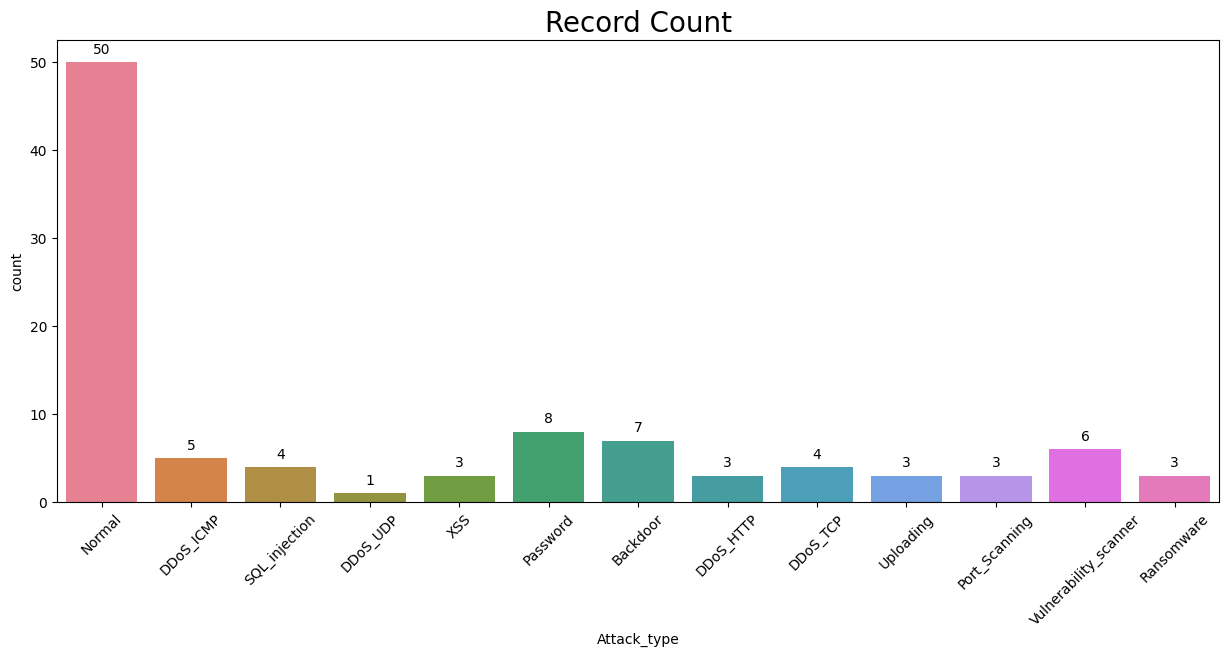

In [110]:
saved_sample_df = pd.read_csv(os.getcwd() + f'/data/sample-{sample_size}-2.csv', low_memory=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
s = sns.countplot(data=saved_sample_df, x='Attack_type', hue='Attack_type')
for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
plt.title('Record Count', fontsize=20)


### Round 1

In [13]:
from langchain_community.chat_models import ChatOllama
from langchain_community.llms import Ollama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
import tiktoken
import json
from sklearn.metrics import classification_report

# Configs
train_set_size = 5
test_set_size = 5
model = "gemma:7b"

y_true = {}
y_pred = {}

def predict(attack_type):
    llm = Ollama(model=model, temperature=0)
    encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

    messages = []
    with open('prompts.json') as f:
        system_prompt1 = ("system", json.load(f)["0"])
    system_prompt2 = ("system", f"The samples has following fields respectively {random_samples_ddos_dfs[attack_type].columns.tolist()}.")

    benign_samples = ""
    attack_samples = ""
    for i in range(train_set_size):
        benign_samples += str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist()) + ">>> BENIGN\n"
        attack_samples += str(random_samples_ddos_dfs[attack_type].iloc[i].values.tolist()) + ">>> ATTACK\n"
    user_prompt = ("user", "Sample logs are given below ```" + benign_samples + attack_samples + "```")
    messages.append(system_prompt1)
    messages.append(system_prompt2)
    messages.append(user_prompt)
    messages.append(("user", "{input}"))

    # print("Messages:", messages)
    num_tokens = len(encoding.encode(str(messages)))
    print("Num tokens:", num_tokens)

    prompt = ChatPromptTemplate.from_messages(messages)
    chain = prompt | llm | StrOutputParser()

    y_true[attack_type] = []
    y_pred[attack_type] = []

    print("Predicting benign samples...")
    for i in range(train_set_size, train_set_size + test_set_size):
        y_true[attack_type].append("BENIGN")
        y_pred[attack_type].append(chain.invoke({"input": "Predict attack or benign: " + 
                                    str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist())}))
        print(i-train_set_size+1, end=" ")
        print(y_pred[attack_type][-1])

    print("\nPredicting attack samples...")
    for j in range(train_set_size, train_set_size + test_set_size):
        y_true[attack_type].append("ATTACK")
        y_pred[attack_type].append(chain.invoke({"input": "Predict attack or benign: " + 
                                    str(random_samples_ddos_dfs[attack_type].iloc[j].values.tolist())}))
        print(j-train_set_size+1, end=" ")
        print(y_pred[attack_type][-1])

    print(classification_report(y_true[attack_type], y_pred[attack_type]))

In [14]:
for attack_type in attack_types[:1]:
    print(f"Predicting for attack type: {attack_type}")
    predict(attack_type)

Predicting for attack type: DDoS_HTTP
Num tokens: 2359
Predicting benign samples...
1 Human: Predict attack or benign: [' 2021 20:55:46.721770000 ', '192.168.0.101', '192.168.0.128', '0', '0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0']
2 Human: Predict attack or benign: [' 2021 16:23:11.253690000 ', '192.168.0.128', '192.168.0.101', '0', '0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'

In [16]:
with open('y_pred.json', 'w') as f:
    json.dump(y_pred, f)

### Round 2

In [7]:
from langchain_community.chat_models import ChatOllama
from langchain_community.llms import Ollama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
import tiktoken
import json
from sklearn.metrics import classification_report

# Configs
train_set_size = 25
test_set_size = 25
model = "gemma:7b"

y_true = {}
y_pred = {}

def predict(attack_type):
    llm = Ollama(model=model, temperature=0)
    encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

    messages = []
    with open('prompts.json') as f:
        system_prompt1 = ("system", json.load(f)["0"])
    system_prompt2 = ("system", f"The samples has following fields respectively {random_samples_ddos_dfs[attack_type].columns.tolist()}.")
    messages.append(system_prompt1)
    messages.append(system_prompt2)

    # benign_samples = ""
    # attack_samples = ""
    for i in range(train_set_size):
        messages.append(("user", str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist())))
        messages.append(("ai", "BENIGN"))
        messages.append(("user", str(random_samples_ddos_dfs[attack_type].iloc[i].values.tolist())))
        messages.append(("ai", "ATTACK"))
        # benign_samples += str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist()) + ">>> BENIGN\n"
        # attack_samples += str(random_samples_ddos_dfs[attack_type].iloc[i].values.tolist()) + ">>> ATTACK\n"
    # user_prompt = ("user", "Sample logs are given below ```" + benign_samples + attack_samples + "```")
    # messages.append(user_prompt)
    messages.append(("user", "{input}"))

    print("Messages:", messages)
    num_tokens = len(encoding.encode(str(messages)))
    print("Num tokens:", num_tokens)

    # prompt = ChatPromptTemplate.from_messages(messages)
    # chain = prompt | llm | StrOutputParser()

    # y_true[attack_type] = []
    # y_pred[attack_type] = []

    # print("Predicting benign samples...")
    # for i in range(train_set_size, train_set_size + test_set_size):
    #     y_true[attack_type].append("BENIGN")
    #     y_pred[attack_type].append(chain.invoke({"input": "Predict attack or benign: " + 
    #                                 str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist())}))
    #     print(i-train_set_size+1, end=" ")
    #     print(y_pred[attack_type][-1])

    # print("\nPredicting attack samples...")
    # for j in range(train_set_size, train_set_size + test_set_size):
    #     y_true[attack_type].append("ATTACK")
    #     y_pred[attack_type].append(chain.invoke({"input": "Predict attack or benign: " + 
    #                                 str(random_samples_ddos_dfs[attack_type].iloc[j].values.tolist())}))
    #     print(j-train_set_size+1, end=" ")

    # print(classification_report(y_true[attack_type], y_pred[attack_type]))

In [8]:
for attack_type in attack_types[:1]:
    print(f"Predicting for attack type: {attack_type}")
    predict(attack_type)

Predicting for attack type: DDoS_HTTP
Messages: [('system', "You are intelligent network log analyzer. User gives you samples of benign and attack iot network data. Analyze the samples and check whether the user given data is benign or not. Output the label 'ATTACK' or 'BENIGN', nothing else."), ('system', "The samples has following fields respectively ['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.src.proto_ipv4', 'http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport', 'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic']."), ('user', "[' 2021 12:18:05.921747000 ', '192.168.0

In [10]:
for i in range(25, 50):
    print(str(random_samples_ddos_dfs["DDoS_HTTP"].iloc[i].values.tolist()))

[' 2021 11:35:50.114362000 ', '192.168.0.170', '192.168.0.128', '0', '0', '0', 0.0, '0.0', '0', '0', '0', '0', 0.0, 1.0, 2933067421.0, 56366.0, 0.0, 0.0, 0.0, 0.0, 80.0, 24.0, 1.0, 32.0, '0101080a0aa4ce831dd5240c', '582d444f6b6f335070764c69574347516a4566323a2034774653775764710d0a', 382.0, '57056.0', '0.0', '0.0', '0.0', '0.0', '0.0']
[' 2021 11:36:44.022287000 ', '192.168.0.128', '192.168.0.170', '0', '0', '0', 0.0, '0.0', '0', '0', '0', '0', 0.0, 500.0, 2008827281.0, 25635.0, 0.0, 0.0, 0.0, 0.0, 32876.0, 16.0, 1.0, 0.0, '0101080a1dd602430aa5a15b', '0', 1.0, '80.0', '0.0', '0.0', '0.0', '0.0', '0.0']
[' 2021 11:37:20.450187000 ', '192.168.0.170', '192.168.0.128', '0', '0', '0', 0.0, '0.0', '0', '0', '0', '0', 0.0, 0.0, 0.0, 39477.0, 0.0, 0.0, 1.0, 0.0, 80.0, 2.0, 0.0, 0.0, '020405b40402080a0aa62ff70000000001030307', '0', 0.0, '38922.0', '0.0', '0.0', '0.0', '0.0', '0.0']
[' 2021 11:37:52.054638000 ', '192.168.0.170', '192.168.0.128', '0', '0', '0', 0.0, '0.0', '0', '0', '0', '0', 0.0, 